In [21]:
import pandas as pd
import numpy  as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

Importing the data

In [22]:
df=pd.read_csv("/Users/trivikramgss/Documents/Telco_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploratory Data Analysis

In [23]:
df.shape

(7043, 21)

In [24]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [26]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
for column in df.columns:
    print('Column :{} - Unique Values: {}'.format(column,df[column].unique()))

Column :customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column :gender - Unique Values: ['Female' 'Male']
Column :SeniorCitizen - Unique Values: [0 1]
Column :Partner - Unique Values: ['Yes' 'No']
Column :Dependents - Unique Values: ['No' 'Yes']
Column :tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column :PhoneService - Unique Values: ['No' 'Yes']
Column :MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column :InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column :OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column :OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column :DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column :TechSuppor

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df.duplicated().sum()

0

From the EDA, we understand that there are only 4 numerical columns and the rest are categorical columns. In the numerical columns we have MonthlyCharges, TotalCharges, tensure and SeniorCitizen. But SeniorCitizen has values 0 or 1. Hence, we do not have to do One hot encoding. The rest of the features in categorical columns have two or more as their values which are undedined. 

Partner: whether the customer has a partner or not (Yes, No),
Dependents: whether the customer has dependents or not (Yes, No),
OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
tenure: number of months the customer has stayed with the company,
MonthlyCharges: the amount charged to the customer monthly,
TotalCharges: the total amount charged to the customer.

In the above dataset we have 7043 columns  and 21 features. In which 20 features including the customer id are the independent variable and Churn column is the target variable. 

However, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [32]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.drop(columns="customerID", inplace=True)

In [36]:
for column in df.columns:
    print('Column :{} - Unique Values: {}'.format(column,df[column].unique()))

Column :gender - Unique Values: ['Female' 'Male']
Column :SeniorCitizen - Unique Values: [0 1]
Column :Partner - Unique Values: ['Yes' 'No']
Column :Dependents - Unique Values: ['No' 'Yes']
Column :tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column :PhoneService - Unique Values: ['No' 'Yes']
Column :MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column :InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column :OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column :OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column :DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column :TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column :StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

As observed in the above unique columns in the PaymentMethod, contains paranthesis which can be simplfied by removing those.

In [37]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '', regex= False)
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

We need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process. 

In [39]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [40]:
df.skew(numeric_only= True)

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [41]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

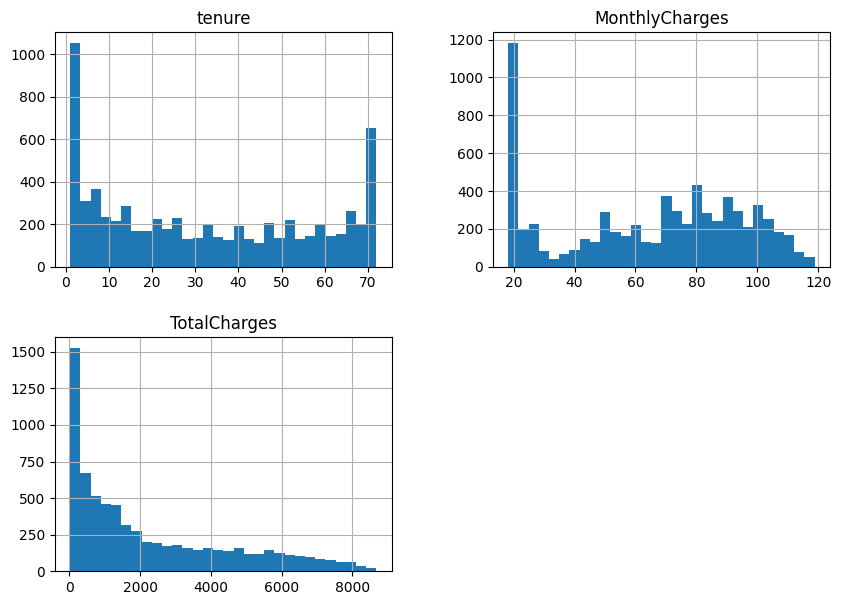

In [42]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

We can understand from the graph that the greater the total charges is greater the tenure which results in less churn. 

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

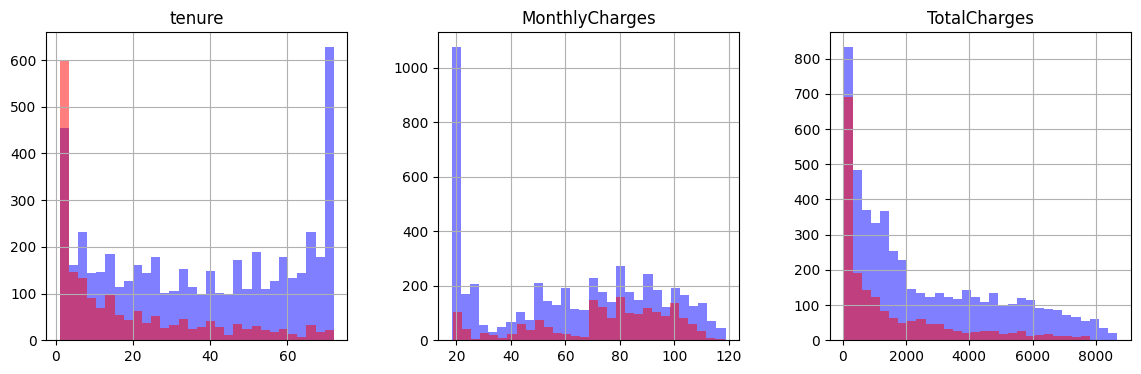

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

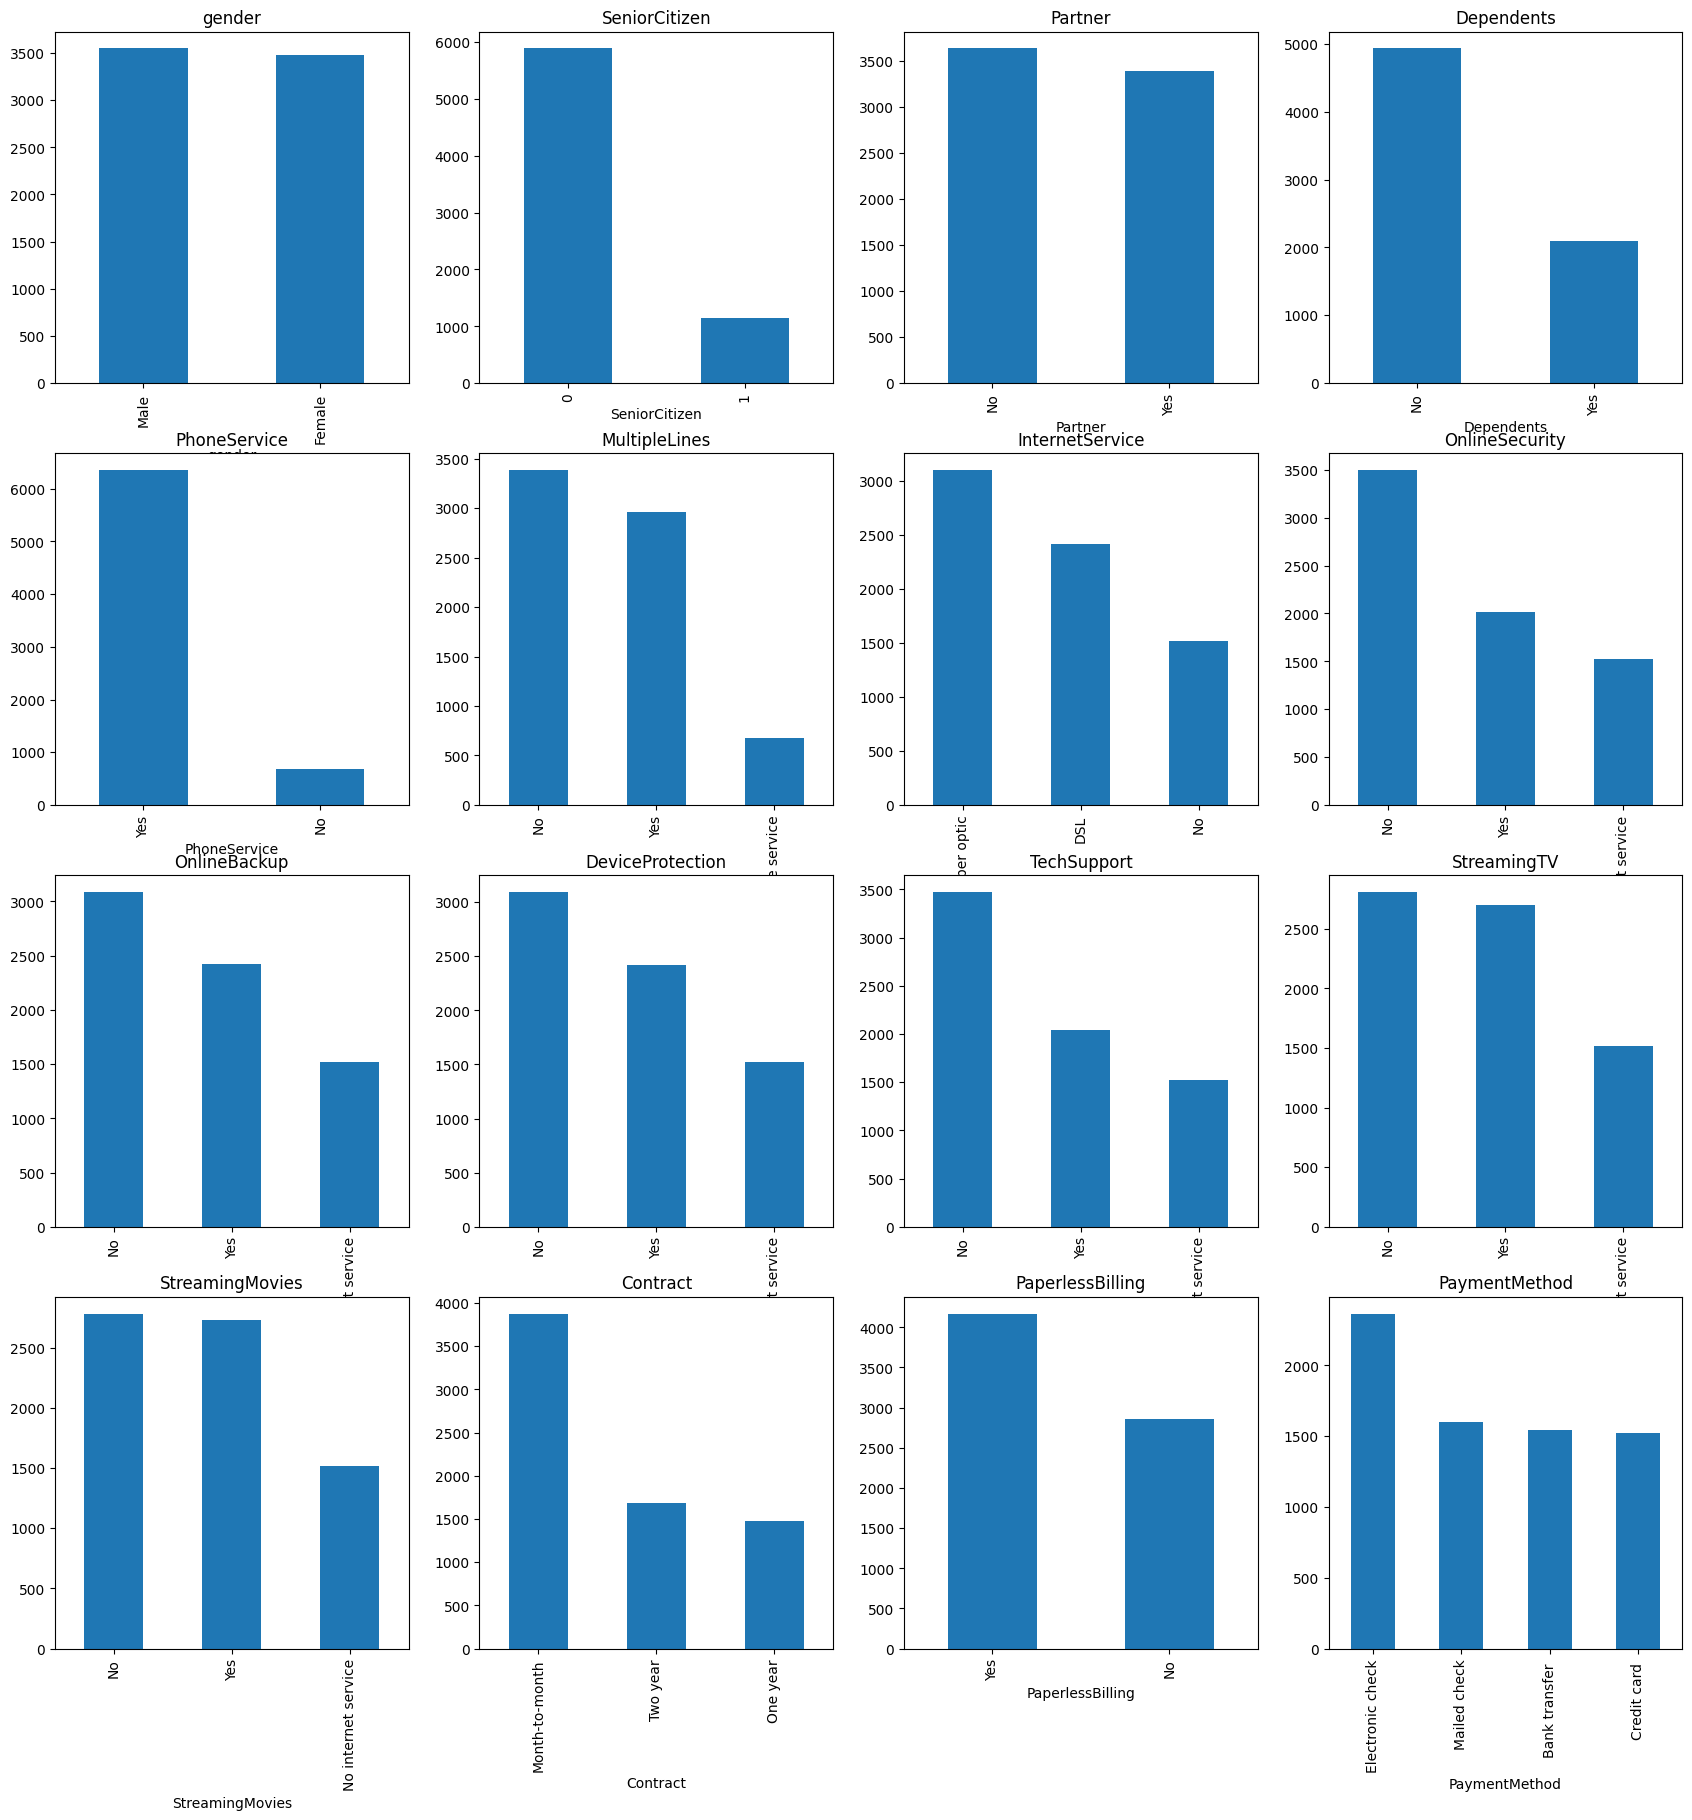

In [47]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(21,21))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

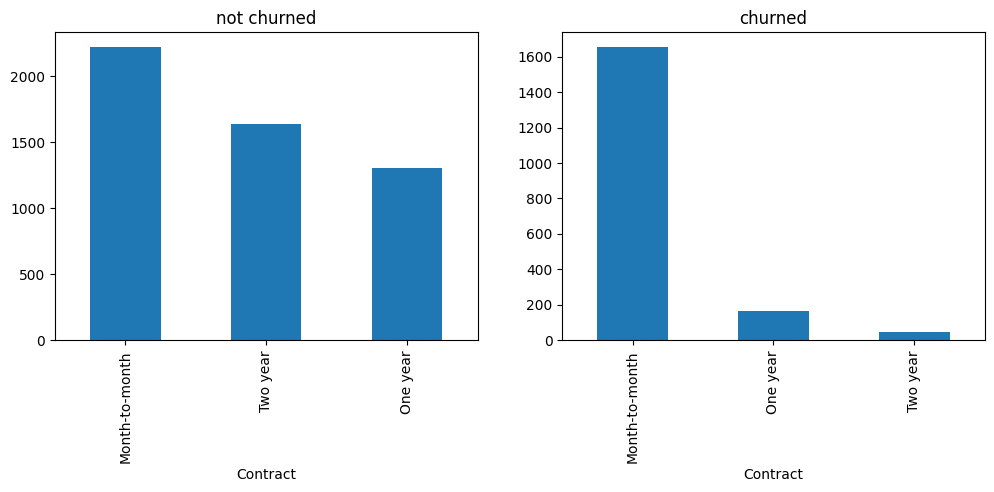

In [48]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

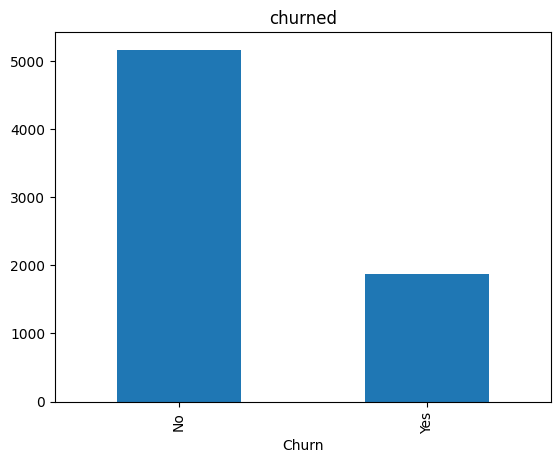

In [49]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Feature Selections and Encoding

We use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn and we apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV, and (10)StreamingMovies.

In [50]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

In [51]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

Normalisation 

In this project, we will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [53]:
# scale numerical variables using min max scaler
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

Splitting the dataset into X and Y

First, we create a variable X to store the independent attributes of the dataset. Additionally, we create a variable y to store only the target variable (Churn).

In [54]:
# select independent variables
X = df_transformed.drop(columns='Churn')

# select dependent variables
y = df_transformed.loc[:, 'Churn']
print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer ',
       'PaymentMethod_Credit card ', 'Pa

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('decision_tree', DecisionTreeClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [64]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)
Classifier: support_vector_machines, Accuracy: 0.7878270762229806)
Classifier: random_forest, Accuracy: 0.767349260523322)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)
Classifier: decision_tree, Accuracy: 0.7224118316268487)


Gradient Boosting is a widely used ensemble method in machine learning, leveraging the sequential training of multiple models to improve predictions. The process starts by building an initial model using a random sample of the original dataset. Once this model is trained, its predictions are used to compute residuals, which represent the differences between the actual values and the model's predictions. A new model is then trained on these residuals, and the process is repeated iteratively. This continues until the residuals are minimized, indicating that the difference between the actual and predicted values is very small. The final prediction is obtained by summing the forecasts from all models in the sequence, which includes both the initial predictions and the predictions of the errors.

To implement a gradient boosting classifier in Scikit-Learn, we use the `GradientBoostingClassifier` class from the `sklearn.ensemble` module. The model is trained using the `.fit` method and its performance is evaluated by comparing its predictions, obtained via the `.predict` method, with the actual class values.

The `GradientBoostingClassifier` has several hyperparameters that can be adjusted to optimize performance:

- `learning_rate`: Controls the contribution of each tree to the final prediction.
- `n_estimators`: Specifies the number of decision trees (boosting stages) to be performed.
- `max_depth`: Defines the maximum depth of the individual regression estimators.
- `max_features`: Indicates the number of features to consider when searching for the best split.
- `min_samples_split`: Sets the minimum number of samples required to split an internal node.

The process of finding the optimal combination of these hyperparameters, known as hyperparameter tuning, is crucial for achieving the best classification results.

We can implement random search in Scikit-learn using the RandomSearchCV class from the sklearn.model_selection package.

First of all, we specify the grid of hyperparameter values using a dictionary (grid_parameters) where the keys represent the hyperparameters and the values are the set of options we want to evaluate. Then, we define the RandomizedSearchCV object for trying different random combinations from this grid. The number of hyperparameter combinations that are sampled is defined in the n_iter parameter. Naturally, increasing n_iter will lead in most cases to more accurate results, since more combinations are sampled; however, on many occasions, the improvement in performance won’t be significant.

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 3}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [68]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1160,  150],
       [ 197,  251]])

In [69]:
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1310
           1       0.63      0.56      0.59       448

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [70]:
accuracy_score(y_test, random_search_predictions) 

0.8026166097838453